#### Handwritten Letters Dataset
It contains the following info:
The main dataset (letters.zip)
1650 (50x33) color images (32x32x3) with 33 letters and the file with labels letters.txt. Photo files are in the .png format and the labels are integers and values. Additional letters.csv file. The file LetterColorImages.h5 consists of preprocessing images of this set: image tensors and targets (labels).

The additional dataset (letters2.zip)
5940 (180x33) color images (32x32x3) with 33 letters and the file with labels letters2.txt. Photo files are in the .png format and the labels are integers and values. Additional letters2.csv file. The file LetterColorImages2.h5 consists of preprocessing images of this set: image tensors and targets (labels).

The additional dataset (letters3.zip)
6600 (200x33) color images (32x32x3) with 33 letters and the file with labels letters2.txt. Photo files are in the .png format and the labels are integers and values. Additional letters3.csv file. The file LetterColorImages3.h5 consists of preprocessing images of this set: image tensors and targets (labels). Letter Symbols => Letter Labels а=>1, б=>2, в=>3, г=>4, д=>5, е=>6, ё=>7, ж=>8, з=>9, и=>10, й=>11, к=>12, л=>13, м=>14, н=>15, о=>16, п=>17, р=>18, с=>19, т=>20, у=>21, ф=>22, х=>23, ц=>24, ч=>25, ш=>26, щ=>27, ъ=>28, ы=>29, ь=>30, э=>31, ю=>32, я=>33

Image Backgrounds => Background Labels striped=>0, gridded=>1, no background=>2, graph paper=>3

The new version (zip_letters.zip)
Letter Symbols => Letter Labels а=>00, б=>01, в=>02, г=>03, д=>04, е=>05, ё=>06, ж=>07, з=>08, и=>09, й=>10, к=>11, л=>12, м=>13, н=>14, о=>15, п=>16, р=>17, с=>18, т=>19, у=>20, ф=>21, х=>22, ц=>23, ч=>24, ш=>25, щ=>26, ъ=>27, ы=>28, ь=>29, э=>30, ю=>31, я=>32

'lowercase'=>00, 'uppercase'=>01

Image Backgrounds => Background Labels 'single-colored paper'=>00, 'striped paper'=>01, 'squared paper'=>02, 'graph paper'=>03

In [8]:
# Solution 1: Import libraries and extract dataset
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import os
from PIL import Image

# Set base directory
BASE_DIR = '/Users/vbaderdi/Downloads/Handwritten_Letter_Dataset'

# Define paths
letters_path = os.path.join(BASE_DIR, 'letters')
letters2_path = os.path.join(BASE_DIR, 'letters2')
letters3_path = os.path.join(BASE_DIR, 'letters3')

In [9]:
# Solution 2: Import CSV files and combine them with proper file paths
letters_df1 = pd.read_csv(os.path.join(BASE_DIR, 'letters.csv'))
letters_df1['folder'] = 'letters'  # Add folder information
letters_df1['file_path'] = letters_df1.apply(lambda x: os.path.join(BASE_DIR,'letters', x['file']), axis=1)

letters_df2 = pd.read_csv(os.path.join(BASE_DIR, 'letters2.csv'))
letters_df2['folder'] = 'letters2'
letters_df2['file_path'] = letters_df2.apply(lambda x: os.path.join(BASE_DIR,'letters2', x['file']), axis=1)

letters_df3 = pd.read_csv(os.path.join(BASE_DIR, 'letters3.csv'))
letters_df3['folder'] = 'letters3'
letters_df3['file_path'] = letters_df3.apply(lambda x: os.path.join(BASE_DIR,'letters3', x['file']), axis=1)

combined_df = pd.concat([letters_df1, letters_df2, letters_df3], ignore_index=True)
combined_df

,letter,label,file,background,folder,file_path
0,а,1,01_01.png,0,letters,/Users/vbaderdi/Downloads/Handwritten_Letter_D...
1,а,1,01_02.png,0,letters,/Users/vbaderdi/Downloads/Handwritten_Letter_D...
2,а,1,01_03.png,0,letters,/Users/vbaderdi/Downloads/Handwritten_Letter_D...
3,а,1,01_04.png,0,letters,/Users/vbaderdi/Downloads/Handwritten_Letter_D...
4,а,1,01_05.png,0,letters,/Users/vbaderdi/Downloads/Handwritten_Letter_D...
...,...,...,...,...,...,...
14185,я,33,33_426.png,3,letters3,/Users/vbaderdi/Downloads/Handwritten_Letter_D...
14186,я,33,33_427.png,3,letters3,/Users/vbaderdi/Downloads/Handwritten_Letter_D...
14187,я,33,33_428.png,3,letters3,/Users/vbaderdi/Downloads/Handwritten_Letter_D...
14188,я,33,33_429.png,3,letters3,/Users/vbaderdi/Downloads/Handwritten_Letter_D...


Dataset Shape: (14190, 6)

Columns: ['letter', 'label', 'file', 'background', 'folder', 'file_path']

Sample data:
  letter  label       file  background   folder  \
0      а      1  01_01.png           0  letters   
1      а      1  01_02.png           0  letters   
2      а      1  01_03.png           0  letters   
3      а      1  01_04.png           0  letters   
4      а      1  01_05.png           0  letters   

                                           file_path  
0  /Users/vbaderdi/Downloads/Handwritten_Letter_D...  
1  /Users/vbaderdi/Downloads/Handwritten_Letter_D...  
2  /Users/vbaderdi/Downloads/Handwritten_Letter_D...  
3  /Users/vbaderdi/Downloads/Handwritten_Letter_D...  
4  /Users/vbaderdi/Downloads/Handwritten_Letter_D...  


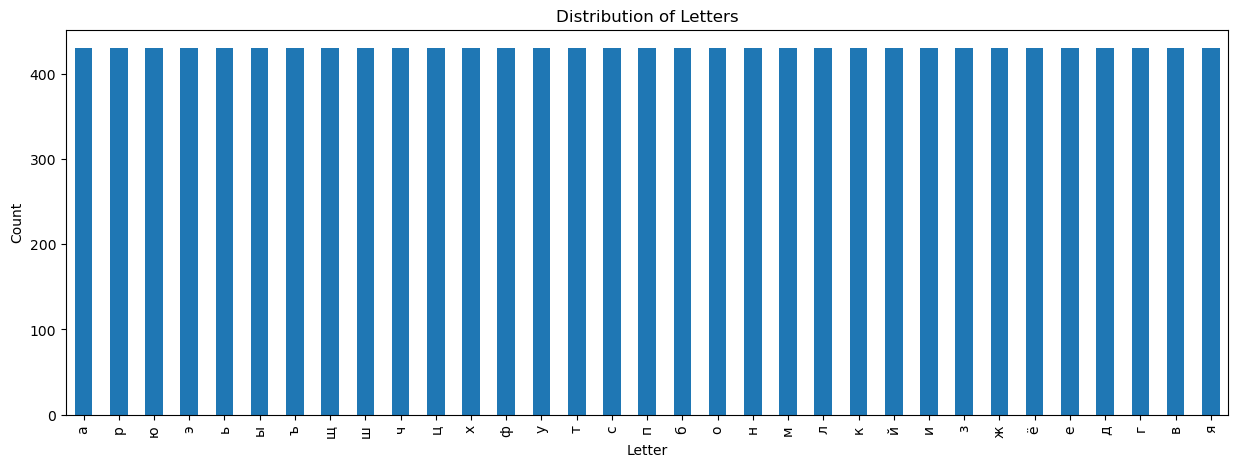

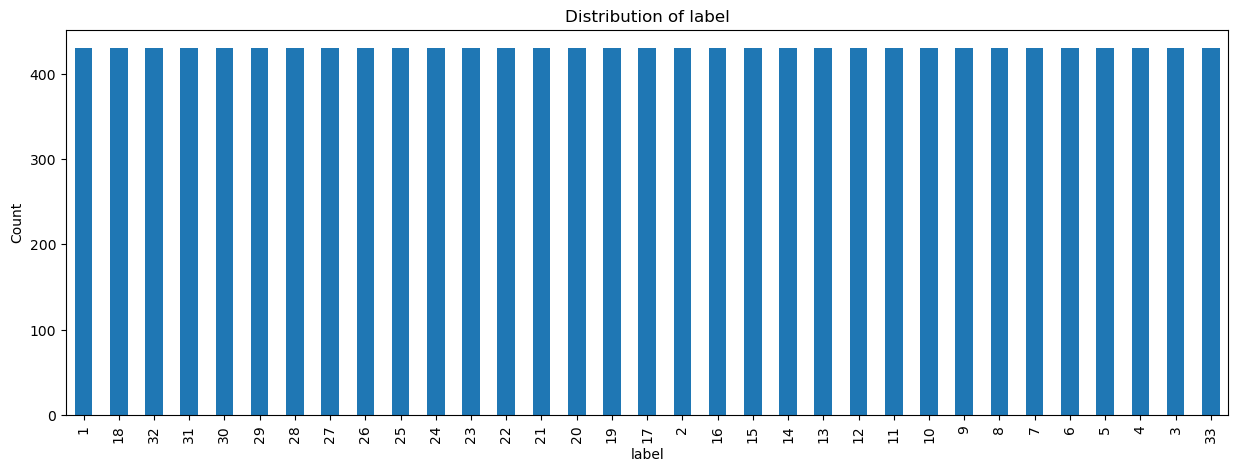

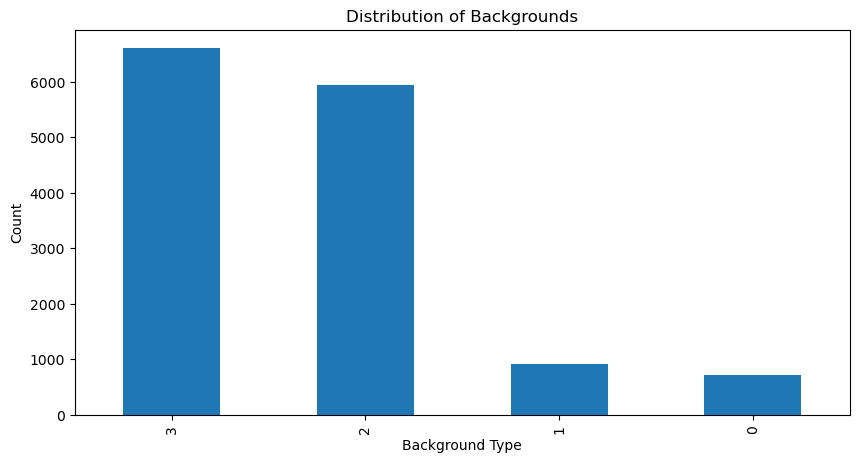

In [10]:
# Solution 3: Exploratory Data Analysis
def perform_eda(df):
    print("Dataset Shape:", df.shape)
    print("\nColumns:", df.columns.tolist())
    print("\nSample data:")
    print(df.head())
    
    # Count distribution of letters
    plt.figure(figsize=(15, 5))
    df['letter'].value_counts().plot(kind='bar')
    plt.title('Distribution of Letters')
    plt.xlabel('Letter')
    plt.ylabel('Count')
    plt.show()
    
    # Count distribution of label
    plt.figure(figsize=(15, 5))
    df['label'].value_counts().plot(kind='bar')
    plt.title('Distribution of label')
    plt.xlabel('label')
    plt.ylabel('Count')
    plt.show()
    
    # Count distribution of backgrounds
    plt.figure(figsize=(10, 5))
    df['background'].value_counts().plot(kind='bar')
    plt.title('Distribution of Backgrounds')
    plt.xlabel('Background Type')
    plt.ylabel('Count')
    plt.show()

perform_eda(combined_df)


In [11]:
class HandWrittenDataSet(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_file = row['file']
        label = row['label'] -1
            
        img_path = row['file_path']
        
        try:
            image = Image.open(img_path).convert('RGB')
        except Exception as e:
            print(f"Error loading image: {img_path}")
            print(f"Error message: {str(e)}")
            return None
            
        if self.transform:
            image = self.transform(image)
            
        return image, label
    

# Split dataset
train_size = int(0.8 * len(combined_df))
val_size = len(combined_df) - train_size
train_df, val_df = torch.utils.data.random_split(combined_df, [train_size, val_size])
            
        

        

In [13]:
# Define transforms
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225])
])

train_dataset = HandWrittenDataSet(train_df.dataset.iloc[train_df.indices], transform=transform)
val_dataset = HandWrittenDataSet(val_df.dataset.iloc[val_df.indices], transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [5]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.features = nn.Sequential(
            # First Convolutional Block
            nn.Conv2d(3, 32, 3, padding=1),    # Input: 32x32x3 -> Output: 32x32x32
            nn.ReLU(inplace=True),             # Activation function
            nn.BatchNorm2d(32),                # Batch Normalization
            nn.MaxPool2d(2, 2),                # Output: 16x16x32

            # Second Convolutional Block
            nn.Conv2d(32, 64, 3, padding=1),   # Input: 16x16x32 -> Output: 16x16x64
            nn.ReLU(inplace=True),             # Activation function
            nn.BatchNorm2d(64),                # Batch Normalization
            nn.MaxPool2d(2, 2),                # Output: 8x8x64

            # Third Convolutional Block
            nn.Conv2d(64, 128, 3, padding=1),  # Input: 8x8x64 -> Output: 8x8x128
            nn.ReLU(inplace=True),             # Activation function
            nn.BatchNorm2d(128),               # Batch Normalization
            nn.MaxPool2d(2, 2),                # Output: 4x4x128
        )
        
        self.classifier = nn.Sequential(
            nn.Dropout(0.5),                   # Dropout for regularization
            nn.Linear(128 * 4 * 4, 512),       # Fully connected layer (2048 -> 512)
            nn.ReLU(inplace=True),             # Activation function
            nn.Dropout(0.5),                   # Dropout for regularization
            nn.Linear(512, 33)                 # Output layer (512 -> 33 classes)
        )

    def forward(self, x):
        x = self.features(x)                   # Pass through convolutional layers
        x = x.view(-1, 128 * 4 * 4)           # Flatten for fully connected layers
        x = self.classifier(x)                 # Pass through classifier
        return x


Training on device: cpu
Epoch [1/20]
Train Loss: 2.5976, Train Acc: 26.59%
Val Loss: 1.4116, Val Acc: 57.61%
--------------------------------------------------
Epoch [2/20]
Train Loss: 1.3478, Train Acc: 59.13%
Val Loss: 0.7708, Val Acc: 77.20%
--------------------------------------------------
Epoch [3/20]
Train Loss: 0.9213, Train Acc: 71.82%
Val Loss: 0.5729, Val Acc: 83.12%
--------------------------------------------------
Epoch [4/20]
Train Loss: 0.7555, Train Acc: 77.28%
Val Loss: 0.5055, Val Acc: 85.02%
--------------------------------------------------
Epoch [5/20]
Train Loss: 0.6481, Train Acc: 79.91%
Val Loss: 0.3937, Val Acc: 88.05%
--------------------------------------------------
Epoch [6/20]
Train Loss: 0.5551, Train Acc: 82.88%
Val Loss: 0.3653, Val Acc: 89.32%
--------------------------------------------------
Epoch [7/20]
Train Loss: 0.5081, Train Acc: 84.32%
Val Loss: 0.3339, Val Acc: 90.17%
--------------------------------------------------
Epoch [8/20]
Train Loss:

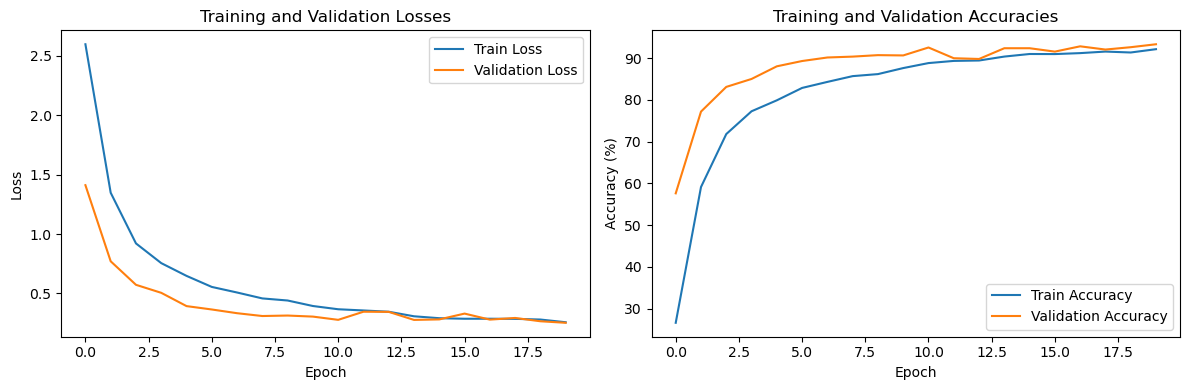

In [53]:
# Initialize model, loss function, and optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 20
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
best_val_loss = float('inf')

print(f"Training on device: {device}")

# Create a directory for saving models if it doesn't exist
model_save_dir = os.path.join(BASE_DIR, 'models')
os.makedirs(model_save_dir, exist_ok=True)

for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    train_loss = running_loss/len(train_loader)
    train_acc = 100 * correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    
    # Validation phase
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    val_loss = val_loss/len(val_loader)
    val_acc = 100 * correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    
    # Save best model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), os.path.join(model_save_dir, 'best_model.pth'))
    
    print(f'Epoch [{epoch+1}/{num_epochs}]')
    print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%')
    print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')
    print('-' * 50)

# Plot training curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracies')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()

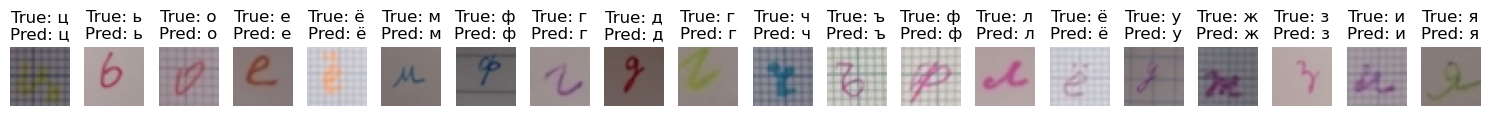

In [14]:
# Solution 6: Plot predictions vs true labels
def plot_predictions(model, val_loader, num_samples=20):
    model.eval()
    images, labels = next(iter(val_loader))
    images, labels = images[:num_samples].to(device), labels[:num_samples].to(device)
    
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    
    # Create mapping from label to letter
    label_to_letter = dict(zip(combined_df['label'] - 1, combined_df['letter']))
    
    fig = plt.figure(figsize=(15, 3))
    for idx in range(num_samples):
        ax = fig.add_subplot(1, num_samples, idx+1)
        img = images[idx].cpu().numpy().transpose(1, 2, 0)
        img = (img * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406])
        img = np.clip(img, 0, 1)
        
        true_letter = label_to_letter[labels[idx].item()]
        pred_letter = label_to_letter[predicted[idx].item()]
        
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f'True: {true_letter}\nPred: {pred_letter}')
    
    plt.tight_layout()
    plt.show()

# Load best model and show predictions
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN().to(device)
model.load_state_dict(torch.load('/Users/vbaderdi/Downloads/Handwritten_Letter_Dataset/models/best_model.pth'))
plot_predictions(model, val_loader)
